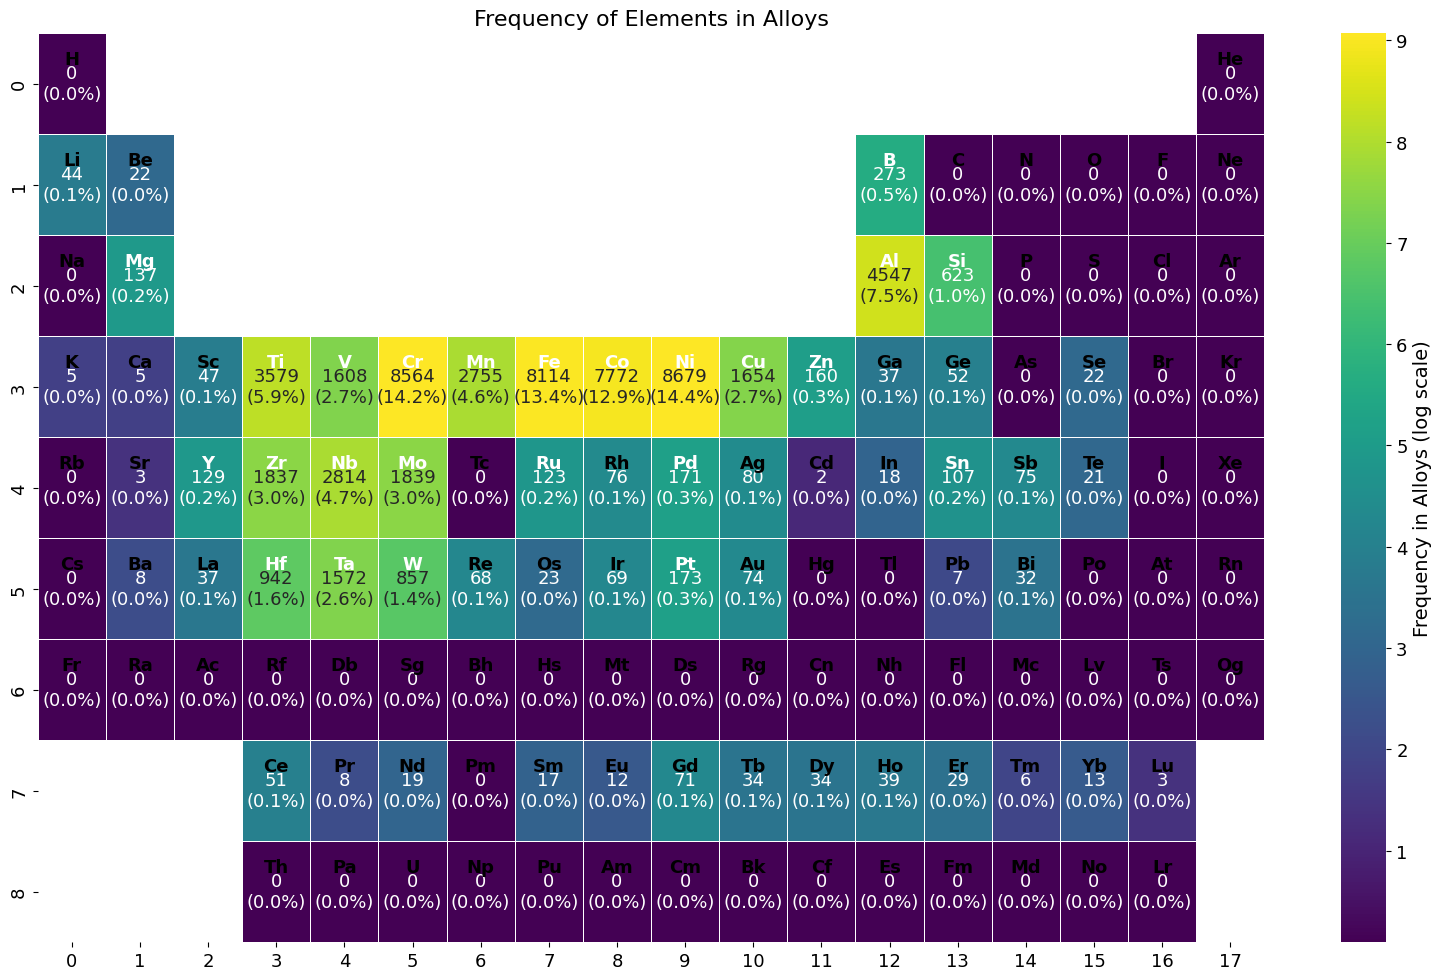

Total number of distinct alloys: 6048

Top 10 most common elements in the alloys:
Ni: 8679 (14.4%)
Cr: 8564 (14.2%)
Fe: 8114 (13.4%)
Co: 7772 (12.9%)
Al: 4547 (7.5%)
Ti: 3579 (5.9%)
Nb: 2814 (4.7%)
Mn: 2755 (4.6%)
Mo: 1839 (3.0%)
Zr: 1837 (3.0%)


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter

# Load the CSV data
df = pd.read_csv('output-merged-data.csv')

# Extract elements from alloy formulas
def extract_elements(alloy):
    if not isinstance(alloy, str):
        return []
    
    # Regular expression to match element symbols (one or two characters)
    # This handles cases like "Fe3Al" or "Ti-6Al-4V" or "CoCrFeMnNi"
    elements = re.findall(r'([A-Z][a-z]?)', alloy)
    return elements

# Apply the function to each alloy and count elements
all_elements = []
for alloy in df['Alloy']:
    all_elements.extend(extract_elements(alloy))

element_counts = Counter(all_elements)

# Define the periodic table layout
periodic_table = [
    ['H', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'He'],
    ['Li', 'Be', '', '', '', '', '', '', '', '', '', '', 'B', 'C', 'N', 'O', 'F', 'Ne'],
    ['Na', 'Mg', '', '', '', '', '', '', '', '', '', '', 'Al', 'Si', 'P', 'S', 'Cl', 'Ar'],
    ['K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr'],
    ['Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe'],
    ['Cs', 'Ba', 'La', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 'At', 'Rn'],
    ['Fr', 'Ra', 'Ac', 'Rf', 'Db', 'Sg', 'Bh', 'Hs', 'Mt', 'Ds', 'Rg', 'Cn', 'Nh', 'Fl', 'Mc', 'Lv', 'Ts', 'Og'],
    ['', '', '', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', ''],
    ['', '', '', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 'Es', 'Fm', 'Md', 'No', 'Lr', '']
]

# Apply the function to each alloy and count elements
all_elements = []
for alloy in df['Alloy']:
    all_elements.extend(extract_elements(alloy))

element_counts = Counter(all_elements)

# Set counts to zero for specified elements
# 1. Nobel gases
nobel_gases = ['He', 'Ne', 'Ar', 'Kr', 'Xe', 'Rn']
# 2. Halogens
halogens = ['F', 'Cl', 'Br', 'I', 'At']
# 3. Compound forming elements
compound_forming = ['H', 'N', 'O', 'C', 'P', 'S']
# 4. Radioactive elements
radioactive = ['Tc', 'Ra', 'Ac', 'Pa', 'U', 'Np', 'Pu']
# 5. Artificially synthesized elements (all elements after Bi)
artificial = ['Po', 'At', 'Rn', 'Fr', 'Ra', 'Ac', 'Rf', 'Db', 'Sg', 'Bh', 'Hs', 'Mt', 'Ds', 'Rg', 'Cn', 'Nh', 'Fl', 'Mc', 'Lv', 'Ts', 'Og', 'Am', 'Cm', 'Bk', 'Cf', 'Es', 'Fm', 'Md', 'No', 'Lr']

elements_to_zero = nobel_gases + halogens + compound_forming + radioactive + artificial

for element in elements_to_zero:
    element_counts[element] = 0

# Calculate total count after zeroing
total_count = sum(element_counts.values())

# Create a matrix for the heatmap
heatmap_data = []
percentage_data = []
for row in periodic_table:
    heatmap_row = []
    percentage_row = []
    for element in row:
        if element == '':
            heatmap_row.append(np.nan)  # Empty cells
            percentage_row.append(np.nan)
        else:
            count = element_counts.get(element, 0)
            heatmap_row.append(count)  # Use actual counts, not logarithmic values
            percentage = (count / total_count * 100) if total_count > 0 else 0
            percentage_row.append(percentage)
    heatmap_data.append(heatmap_row)
    percentage_data.append(percentage_row)

# Convert to numpy array
heatmap_array = np.array(heatmap_data)
percentage_array = np.array(percentage_data)

# Create a mask for empty cells
mask = np.isnan(heatmap_array)

# Create the heatmap with a better color palette
plt.figure(figsize=(16, 10))
# Using a more visually appealing color palette - viridis is colorblind-friendly and perceptually uniform
# Create a log-scaled version of the data for coloring while keeping original values for annotations
log_data = np.copy(heatmap_array)
# Add a small value to avoid log(0)
log_data[log_data == 0] = 0.1
log_data = np.log1p(log_data)  # log1p = log(1+x) to handle small values better

# Create annotation text with both count and percentage
annot_text = np.empty_like(heatmap_array, dtype=object)
for i in range(heatmap_array.shape[0]):
    for j in range(heatmap_array.shape[1]):
        if not np.isnan(heatmap_array[i, j]):
            count = int(heatmap_array[i, j])
            pct = percentage_array[i, j]
            annot_text[i, j] = f"{count}\n({pct:.1f}%)"
        else:
            annot_text[i, j] = ""

ax = sns.heatmap(log_data, mask=mask, cmap="viridis", annot=annot_text, fmt="", 
                 linewidths=0.5, cbar_kws={'label': 'Frequency in Alloys (log scale)'})

# Add element symbols to cells
for i, row in enumerate(periodic_table):
    for j, element in enumerate(row):
        if element != '':
            # Adjust text color based on cell intensity for better readability
            cell_value = log_data[i, j]
            text_color = 'white' if cell_value > np.nanmax(log_data) / 2 else 'black'
            ax.text(j + 0.5, i + 0.3, element, 
                    horizontalalignment='center', 
                    color=text_color, fontweight='bold')

plt.title('Frequency of Elements in Alloys', fontsize=16)
plt.tight_layout()
plt.show()

# Count total number of distinct alloys
total_alloys = len(df['Alloy'].unique())

# Print the top 10 most common elements
print(f"Total number of distinct alloys: {total_alloys}")
print("\nTop 10 most common elements in the alloys:")
for element, count in element_counts.most_common(10):
    percentage = (count / total_count * 100) if total_count > 0 else 0
    print(f"{element}: {count} ({percentage:.1f}%)")


In [4]:
! pip install 





seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


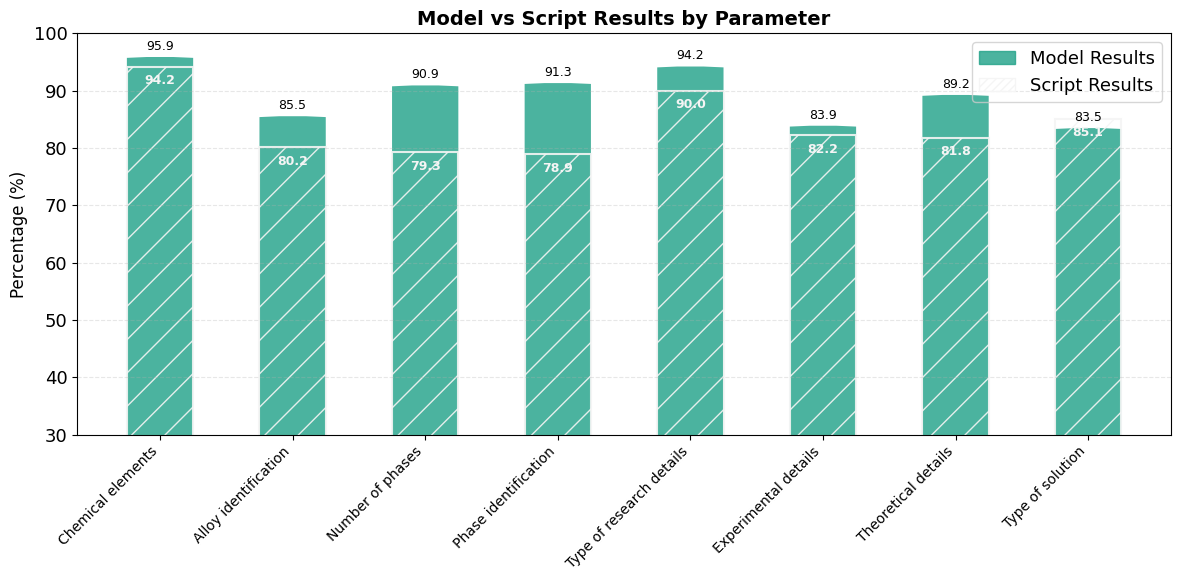

In [2]:
import numpy as np
import matplotlib.pyplot as plt

parameters = [
    "Chemical elements",
    "Alloy identification",
    "Number of phases",
    "Phase identification",
    "Type of research details",
    "Experimental details",
    "Theoretical details",
    "Type of solution",
]
model_results = [
    95.87,
    85.54,
    90.91,
    91.32,
    94.21,
    83.88,
    89.25,
    83.47,
]
script_results = [
    94.21,
    80.16,
    79.33,
    78.93,
    90.01,
    82.23,
    81.81,
    85.12,
]
# Create a histogram with overlaid bars for model and script results
plt.figure(figsize=(12, 6))

x = np.arange(len(parameters))  # the label locations
width = 0.5  # the width of the bars

# Define pleasant colors
model_color = '#1fa187'# dark purple
script_color = 'whitesmoke'  # white

# Create bars with rounded corners
from matplotlib.patches import PathPatch
from matplotlib.path import Path

def rounded_bar(x, height, width, color, alpha=1.0, linewidth=0, radius=0.15):
    # Create the bar with rounded corners
    verts = [
        (x, 0),                      # bottom left
        (x, height - radius),        # top left (minus radius)
        (x + radius, height),        # top left with radius
        (x + width - radius, height),# top right with radius
        (x + width, height - radius),# top right (minus radius)
        (x + width, 0),              # bottom right
        (x, 0),                      # back to bottom left
    ]
    
    codes = [Path.MOVETO] + [Path.LINETO] * 5 + [Path.CLOSEPOLY]
    path = Path(verts, codes)
    patch = PathPatch(path, facecolor=color, alpha=alpha, linewidth=linewidth)
    return patch

# Add model result bars with rounded corners
bars1 = []
for i, height in enumerate(model_results):
    bar = rounded_bar(i - width/2, height, width, model_color, alpha=0.8)
    plt.gca().add_patch(bar)
    bars1.append(bar)

# Add script result bars with hatching
bars2 = []
for i, height in enumerate(script_results):
    bar = plt.bar(i, height, width, label='Script Results' if i == 0 else "", 
                  color='none', edgecolor=script_color, linewidth=1.5,
                  hatch='/', alpha=0.9)
    bars2.append(bar[0])

# Add a dummy patch for the legend
import matplotlib.patches as mpatches
model_patch = mpatches.Patch(color=model_color, alpha=0.8, label='Model Results')
script_patch = mpatches.Patch(facecolor='none', edgecolor=script_color, 
                             hatch='////', label='Script Results')

# Add labels, title and custom x-axis tick labels
plt.ylabel('Percentage (%)', fontsize=12)
plt.title('Model vs Script Results by Parameter', fontsize=14, fontweight='bold')
plt.xticks(x, parameters, rotation=45, ha='right', fontsize=10)
plt.ylim(30, 100)

# Add a legend with custom patches
plt.legend(handles=[model_patch, script_patch], loc='upper right')

# Add value labels on top of bars
for i, bar in enumerate(bars1):
    height = model_results[i]
    plt.annotate(f'{height:.1f}',
                xy=(i, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

for i, bar in enumerate(bars2):
    height = script_results[i]
    plt.annotate(f'{height:.1f}',
                xy=(i, height),
                xytext=(0, -15),  # 15 points vertical offset downward
                textcoords="offset points",
                ha='center', va='bottom', color=script_color, fontweight='bold', fontsize=9)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

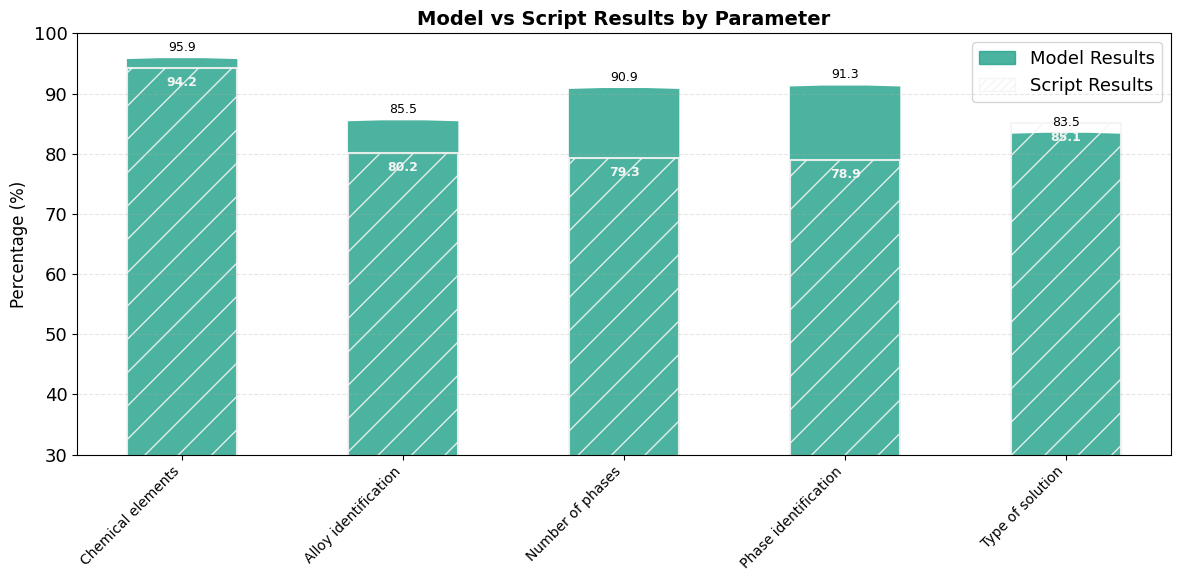

In [5]:
import numpy as np
import matplotlib.pyplot as plt

parameters = [
    "Chemical elements",
    "Alloy identification",
    "Number of phases",
    "Phase identification",
    "Type of solution",
]
model_results = [
    95.87,
    85.54,
    90.91,
    91.32,
    83.47,
]
script_results = [
    94.21,
    80.16,
    79.33,
    78.93,
    85.12,
]

# Create a histogram with overlaid bars for model and script results
plt.figure(figsize=(12, 6), facecolor='none')  # Set figure background to transparent

x = np.arange(len(parameters))  # the label locations
width = 0.5  # the width of the bars

# Define pleasant colors
model_color = '#1fa187'  # dark purple
script_color = 'whitesmoke'  # white

# Create bars with rounded corners
from matplotlib.patches import PathPatch
from matplotlib.path import Path

def rounded_bar(x, height, width, color, alpha=1.0, linewidth=0, radius=0.15):
    # Create the bar with rounded corners
    verts = [
        (x, 0),                      # bottom left
        (x, height - radius),        # top left (minus radius)
        (x + radius, height),        # top left with radius
        (x + width - radius, height),# top right with radius
        (x + width, height - radius),# top right (minus radius)
        (x + width, 0),              # bottom right
        (x, 0),                      # back to bottom left
    ]
    
    codes = [Path.MOVETO] + [Path.LINETO] * 5 + [Path.CLOSEPOLY]
    path = Path(verts, codes)
    patch = PathPatch(path, facecolor=color, alpha=alpha, linewidth=linewidth)
    return patch

# Add model result bars with rounded corners
bars1 = []
for i, height in enumerate(model_results):
    bar = rounded_bar(i - width/2, height, width, model_color, alpha=0.8)
    plt.gca().add_patch(bar)
    bars1.append(bar)

# Add script result bars with hatching
bars2 = []
for i, height in enumerate(script_results):
    bar = plt.bar(i, height, width, label='Script Results' if i == 0 else "", 
                  color='none', edgecolor=script_color, linewidth=1.5,
                  hatch='/', alpha=0.9)
    bars2.append(bar[0])

# Add a dummy patch for the legend
import matplotlib.patches as mpatches
model_patch = mpatches.Patch(color=model_color, alpha=0.8, label='Model Results')
script_patch = mpatches.Patch(facecolor='none', edgecolor=script_color, 
                             hatch='////', label='Script Results')

# Add labels, title and custom x-axis tick labels
plt.ylabel('Percentage (%)', fontsize=12)
plt.title('Model vs Script Results by Parameter', fontsize=14, fontweight='bold')
plt.xticks(x, parameters, rotation=45, ha='right', fontsize=10)
plt.ylim(30, 100)

# Add a legend with custom patches
plt.legend(handles=[model_patch, script_patch], loc='upper right')

# Add value labels on top of bars
for i, bar in enumerate(bars1):
    height = model_results[i]
    plt.annotate(f'{height:.1f}',
                xy=(i, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

for i, bar in enumerate(bars2):
    height = script_results[i]
    plt.annotate(f'{height:.1f}',
                xy=(i, height),
                xytext=(0, -15),  # 15 points vertical offset downward
                textcoords="offset points",
                ha='center', va='bottom', color=script_color, fontweight='bold', fontsize=9)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.gca().set_facecolor('none')  # Set axes background to transparent
plt.show()

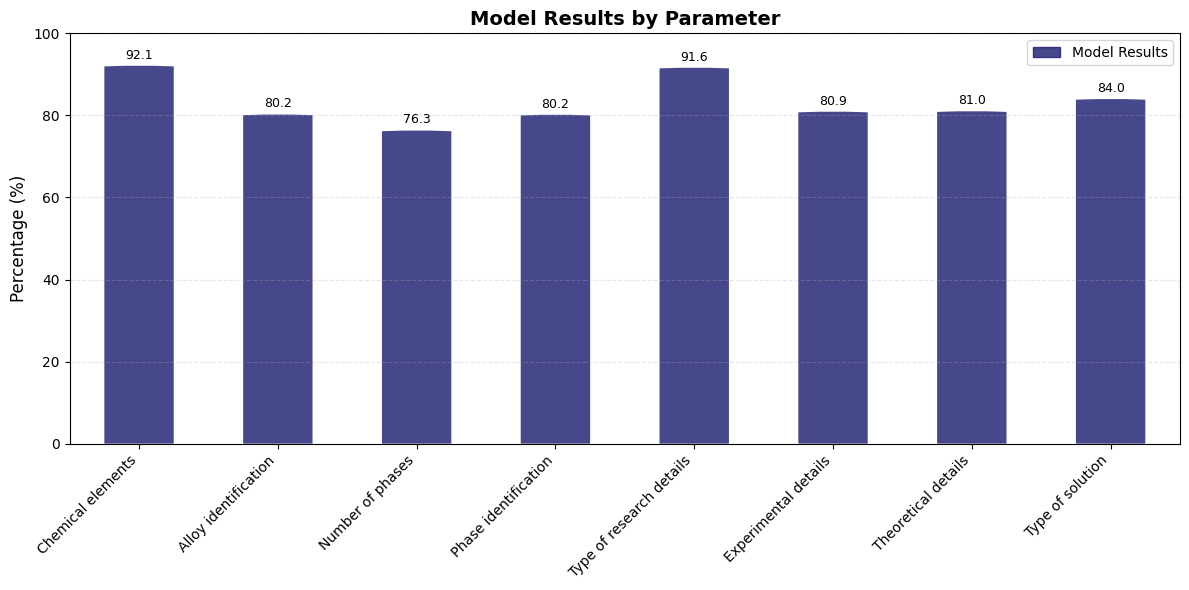

In [9]:
import numpy as np
import matplotlib.pyplot as plt

parameters = [
    "Chemical elements",
    "Alloy identification",
    "Number of phases",
    "Phase identification",
    "Type of research details",
    "Experimental details",
    "Theoretical details",
    "Type of solution",
]
model_results = [
    92.09310345,
    80.20689655,
    76.28974359,
    80.150,
    91.60689655,
    80.89310345,
    81.0,
    83.97241379,
]

# Create a histogram with only model results
plt.figure(figsize=(12, 6))

x = np.arange(len(parameters))  # the label locations
width = 0.5  # the width of the bars

# Define pleasant color
model_color = 'midnightblue'  # dark purple

# Create bars with rounded corners
from matplotlib.patches import PathPatch
from matplotlib.path import Path

def rounded_bar(x, height, width, color, alpha=1.0, linewidth=0, radius=0.15):
    # Create the bar with rounded corners
    verts = [
        (x, 0),                      # bottom left
        (x, height - radius),        # top left (minus radius)
        (x + radius, height),        # top left with radius
        (x + width - radius, height),# top right with radius
        (x + width, height - radius),# top right (minus radius)
        (x + width, 0),              # bottom right
        (x, 0),                      # back to bottom left
    ]
    
    codes = [Path.MOVETO] + [Path.LINETO] * 5 + [Path.CLOSEPOLY]
    path = Path(verts, codes)
    patch = PathPatch(path, facecolor=color, alpha=alpha, linewidth=linewidth)
    return patch

# Add model result bars with rounded corners
bars = []
for i, height in enumerate(model_results):
    # Center the bars on the x positions
    bar = rounded_bar(i - width/2, height, width, model_color, alpha=0.8)
    plt.gca().add_patch(bar)
    bars.append(bar)

# Add a dummy patch for the legend
import matplotlib.patches as mpatches
model_patch = mpatches.Patch(color=model_color, alpha=0.8, label='Model Results')

# Add labels, title and custom x-axis tick labels
plt.ylabel('Percentage (%)', fontsize=12)
plt.title('Model Results by Parameter', fontsize=14, fontweight='bold')
plt.xticks(x, parameters, rotation=45, ha='right', fontsize=10)
plt.ylim(0, 100)  # Set y-axis to go from 0 to 100%

# Adjust x-axis limits to ensure all bars are fully visible
plt.xlim(-0.5, len(parameters) - 0.5)

# Add a legend with custom patch
plt.legend(handles=[model_patch], loc='upper right')

# Add value labels on top of bars
for i, bar in enumerate(bars):
    height = model_results[i]
    plt.annotate(f'{height:.1f}',
                xy=(i, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

In [10]:
# Read the merged data file and filter by specific IDs
import pandas as pd

# Define the path to the CSV file
file_path = 'shaping results/output-merged-data.csv'

# Read the CSV file
df = pd.read_csv(file_path)

# List of IDs to filter
ids_to_keep = [237, 233, 249, 259, 267, 277, 1428, 2205, 4159, 4169]

# Filter the DataFrame to keep only rows with the specified IDs
filtered_df = df[df['id'].isin(ids_to_keep)]

# Save the filtered data to a new CSV file
output_path = 'shaping results/filtered_data.csv'
filtered_df.to_csv(output_path, index=False)

print(f"Filtered data saved to {output_path}")
print(f"Number of rows in filtered data: {len(filtered_df)}")


Filtered data saved to shaping results/filtered_data.csv
Number of rows in filtered data: 28


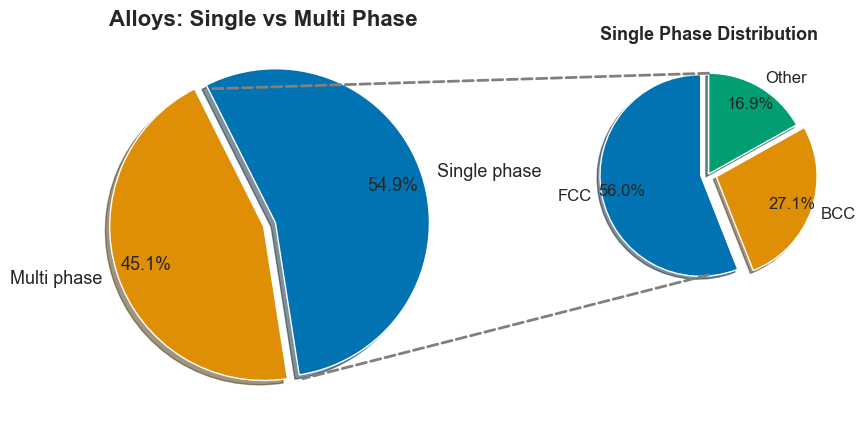

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import ConnectionPatch

sns.set_theme(style='whitegrid')
plt.rcParams.update({'font.size': 13, 'axes.titlesize': 16, 'axes.labelsize': 14})

df = pd.read_csv('merged_data_unnested.csv')
if 'Phase' not in df.columns:
    raise ValueError("The column 'Phase' was not found in the CSV file.")

multi_phase = df['Phase'].str.contains(r'\+', regex=True, na=False)
single_phase = ~multi_phase

labels1 = ['Single phase', 'Multi phase']
sizes1 = [single_phase.sum(), multi_phase.sum()]
colors1 = sns.color_palette('colorblind', 2)
explode1 = [0.08, 0]
startangle = -sizes1[1] / sum(sizes1) * 360 / 2

# Make the main pie smaller by reducing its axes size
fig = plt.figure(figsize=(10, 7))
main_ax = plt.axes([0.08, 0.15, 0.55, 0.55])  # [left, bottom, width, height]
wedges, texts, autotexts = main_ax.pie(
    sizes1, labels=labels1, autopct='%1.1f%%', startangle=startangle,
    colors=colors1, explode=explode1, pctdistance=0.8, textprops={'fontsize': 13}, shadow=True
)
main_ax.set_title('Alloys: Single vs Multi Phase', fontweight='bold')

single_phase_df = df[single_phase].copy()
single_phase_df['phase_norm'] = single_phase_df['Phase'].str.strip().str.upper()
popular_phases = ['HPC', 'BCC', 'FCC']
phase_counts = single_phase_df['phase_norm'].value_counts()
main_counts = phase_counts[phase_counts.index.isin(popular_phases)]
other_count = phase_counts[~phase_counts.index.isin(popular_phases)].sum()
labels2 = list(main_counts.index) + (['Other'] if other_count > 0 else [])
sizes2 = list(main_counts.values) + ([other_count] if other_count > 0 else [])
colors2 = sns.color_palette('colorblind', len(labels2))
explode2 = [0.08 if l in ['HPC', 'BCC', 'FCC'] else 0 for l in labels2]

# Make the single phase pie bigger and move it further right
ax2 = plt.axes([0.62, 0.32, 0.36, 0.36])  # [left, bottom, width, height]
wedges2, texts2, autotexts2 = ax2.pie(
    sizes2, labels=labels2, autopct='%1.1f%%', startangle=90,
    colors=colors2, explode=explode2, pctdistance=0.8, textprops={'fontsize': 12}, shadow=True
)
ax2.set_title('Single Phase Distribution', fontsize=13, fontweight='bold')

# Find the angle of the single phase wedge (center, top, bottom)
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
r = 1
x_top = r * np.cos(np.deg2rad(theta2))
y_top = r * np.sin(np.deg2rad(theta2))
x_bottom = r * np.cos(np.deg2rad(theta1))
y_bottom = r * np.sin(np.deg2rad(theta1))

# For the small pie, connect to top and bottom (in axes fraction coordinates)
# Top: (0.5, 1.0), Bottom: (0.5, 0.0)
con_top = ConnectionPatch(
    xyA=(0.5, 0.9), coordsA=ax2.transAxes,
    xyB=(x_top+0.1, y_top), coordsB=main_ax.transData,
    color='gray', linewidth=2, linestyle='--'
)
con_bottom = ConnectionPatch(
    xyA=(0.5, 0.1), coordsA=ax2.transAxes,
    xyB=(x_bottom+0.1, y_bottom), coordsB=main_ax.transData,
    color='gray', linewidth=2, linestyle='--'
)
fig.add_artist(con_top)
fig.add_artist(con_bottom)

plt.show()

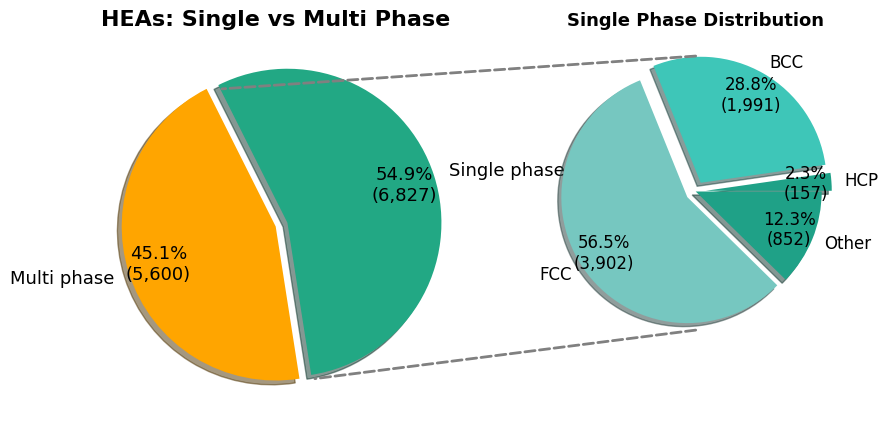

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import ConnectionPatch

sns.set_palette("Greens", 3)
plt.rcParams.update({'font.size': 13, 'axes.titlesize': 16, 'axes.labelsize': 14})

# Set figure background to transparent
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['axes.facecolor'] = 'none'

df = pd.read_csv('merged_data_unnested.csv')
if 'Phase' not in df.columns:
    raise ValueError("The column 'Phase' was not found in the CSV file.")

multi_phase = df['Phase'].str.contains(r'\+', regex=True, na=False)
single_phase = ~multi_phase

labels1 = ['Single phase', 'Multi phase']
sizes1 = [single_phase.sum(), multi_phase.sum()]
colors1 = ['#22a884', 'orange']   
explode1 = [0.08, 0]
startangle = -sizes1[1] / sum(sizes1) * 360 / 2

# Make the main pie smaller by reducing its axes size
fig = plt.figure(figsize=(10, 7), facecolor='none')
main_ax = plt.axes([0.08, 0.15, 0.55, 0.55], facecolor='none')  # [left, bottom, width, height]
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{pct:.1f}%\n({val:,})'
    return my_autopct
wedges, texts, autotexts = main_ax.pie(
    sizes1, labels=labels1, autopct=make_autopct(sizes1), startangle=startangle, colors=colors1, explode=explode1, 
    pctdistance=0.8, textprops={'fontsize': 13}, shadow=True
)
main_ax.set_title('HEAs: Single vs Multi Phase', fontweight='bold')

single_phase_df = df[single_phase].copy()
single_phase_df['phase_norm'] = single_phase_df['Phase'].str.strip().str.upper()

# Count phases containing HCP-related structures (HCP, Laves, C14, etc.)
hcp_pattern = 'HCP|LAVES|C14|C15|C36|HEXAGONAL'
hcp_count = single_phase_df['phase_norm'].str.contains(hcp_pattern, case=False, na=False).sum()
bcc_count = single_phase_df['phase_norm'].str.contains('BCC', case=False, na=False).sum()
fcc_count = single_phase_df['phase_norm'].str.contains('FCC', case=False, na=False).sum()

# Calculate other phases (those not containing HCP-related, BCC, or FCC)
other_count = single_phase_df[~single_phase_df['phase_norm'].str.contains(f'{hcp_pattern}|BCC|FCC', case=False, na=False)].shape[0]

labels2 = ['HCP', 'BCC', 'FCC'] + (['Other'] if other_count > 0 else [])
sizes2 = [hcp_count, bcc_count, fcc_count] + ([other_count] if other_count > 0 else [])
colors2 = ['#1fa187', '#3ec6b8', '#76c7c0']
explode2 = [0.08, 0.08, 0.08] + ([0] if other_count > 0 else [])

# Make the single phase pie bigger and move it further right
ax2 = plt.axes([0.55, 0.25, 0.45, 0.45], facecolor='none')  # [left, bottom, width, height] - made bigger
wedges2, texts2, autotexts2 = ax2.pie(
    sizes2, labels=labels2, autopct=make_autopct(sizes2), startangle=0,  # rotated to 45 degrees
    colors=colors2, explode=explode2, 
    pctdistance=0.8, textprops={'fontsize': 12}, shadow=True
)
ax2.set_title('Single Phase Distribution', fontsize=13, fontweight='bold')

# Find the angle of the single phase wedge (center, top, bottom)
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
r = 1
x_top = r * np.cos(np.deg2rad(theta2))
y_top = r * np.sin(np.deg2rad(theta2))
x_bottom = r * np.cos(np.deg2rad(theta1))
y_bottom = r * np.sin(np.deg2rad(theta1))

# For the small pie, connect to top and bottom (in axes fraction coordinates)
con_top = ConnectionPatch(
    xyA=(0.5, 0.93), coordsA=ax2.transAxes,
    xyB=(x_top+0.1, y_top), coordsB=main_ax.transData,
    color='gray', linewidth=2, linestyle='--'
)
con_bottom = ConnectionPatch(
    xyA=(0.5, 0.06), coordsA=ax2.transAxes,
    xyB=(x_bottom+0.1, y_bottom), coordsB=main_ax.transData,
    color='gray', linewidth=2, linestyle='--'
)
fig.add_artist(con_top)
fig.add_artist(con_bottom)

plt.show()

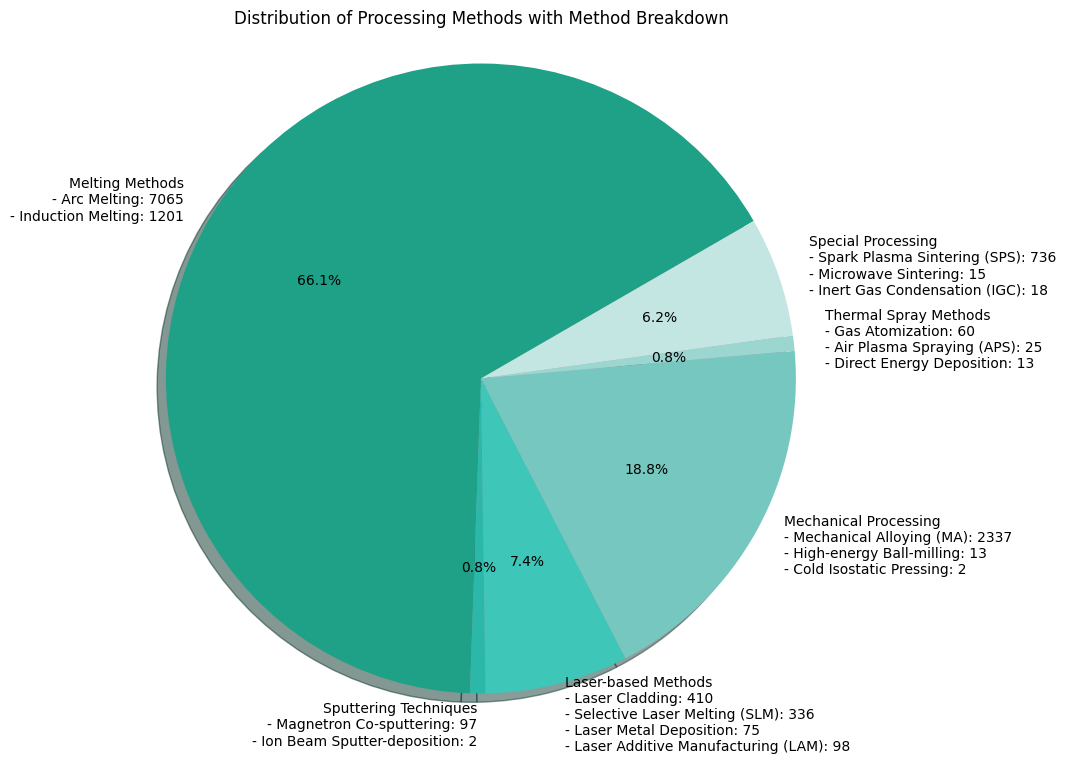

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('merged_data_unnested.csv')

dictionary = {
    "Melting Methods": 
    {
        "Arc Melting": "Arc Melting",
        "Vacuum Arc Melting": "Arc Melting",
        "Induction Melting": "Induction Melting",
        "Vacuum Induction Melting": "Induction Melting",
    },
    "Sputtering Techniques": 
    {
        "Ion Beam Sputter-deposition": "Ion Beam Sputter-deposition",
        "Magnetron Co-sputtering": "Magnetron Co-sputtering", 
        "HiPIMS Magnetron Sputtering": "Magnetron Co-sputtering",
    },
    "Laser-based Methods": 
    {    
        "Laser Additive Manufacturing": "Laser Additive Manufacturing (LAM)",
        "LAM": "Laser Additive Manufacturing (LAM)",
        "Laser Metal Deposition": "Laser Metal Deposition",
        "LMD": "Laser Metal Deposition",
        "Laser Cladding": "Laser Cladding",
        "Selective Laser Melting": "Selective Laser Melting (SLM)",
        "SLM": "Selective Laser Melting (SLM)",
    },
    "Mechanical Processing": 
    {
        "High-energy Ball-milling": "High-energy Ball-milling",
        "Mechanical Alloying (MA)": "Mechanical Alloying (MA)",
        "MA": "Mechanical Alloying (MA)",
        "Cold Isostatic Pressing": "Cold Isostatic Pressing",
    },
    "Thermal Spray Methods": 
    {
        "Air Plasma Spraying (APS)": "Air Plasma Spraying (APS)",
        "APS": "Air Plasma Spraying (APS)",
        "Gas Atomization": "Gas Atomization",
        "Direct Energy Deposition": "Direct Energy Deposition",
    },
    "Special Processing":
    {
        "Spark Plasma Sintering": "Spark Plasma Sintering (SPS)",
        "SPS": "Spark Plasma Sintering (SPS)",
        "Microwave Sintering": "Microwave Sintering",
        "Inert Gas Condensation": "Inert Gas Condensation (IGC)",
        "IGC": "Inert Gas Condensation (IGC)",
    },
}

# Initialize counters for each category and method
category_counts = {category: 0 for category in dictionary.keys()}
method_counts = {category: {} for category in dictionary.keys()}

# Walk through the Experimental details column and count occurrences
for details in df['Experimental details']:
    if pd.isna(details):
        continue
        
    # Check each category in the dictionary
    for category, methods in dictionary.items():
        # Check each method in the category
        for method_key, method_value in methods.items():
            if method_key.lower() in str(details).lower():
                category_counts[category] += 1
                if method_value not in method_counts[category]:
                    method_counts[category][method_value] = 0
                method_counts[category][method_value] += 1

# Create pie chart with detailed labels
plt.figure(figsize=(10, 9))  # Reduced figure size
labels = []
for category in dictionary.keys():
    category_label = f"{category}\n"
    for method, count in method_counts[category].items():
        if count > 0:
            category_label += f"- {method}: {count}\n"
    labels.append(category_label.rstrip())

# Create teal color palette
teal_colors = ['#1fa187', '#2bb8a9', '#3ec6b8', '#76c7c0', '#9cd6d0', '#c4e6e2']

plt.pie(category_counts.values(), 
        labels=labels,
        autopct='%1.1f%%',
        startangle=30,
        shadow=True,
        colors=teal_colors)  # Added teal colors
plt.title('Distribution of Processing Methods with Method Breakdown')
plt.axis('equal')
plt.show()

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
import numpy as np
import re

df = pd.read_csv('merged_data_unnested.csv')

dictionary = {
    "Melting Methods": {
        "Arc Melting": {
            "Arc Melting": "Arc Melting",
            "Vacuum Arc Melting": "Vacuum Arc Melting",
            "VAM": "Vacuum Arc Melting",
            "Non-consumable Arc Melting": "Arc Melting",
            "Tungsten Arc Melting": "Arc Melting",
            "Plasma Arc Melting": "Plasma Arc Melting",
            "PAM": "Plasma Arc Melting",
        },
        "Induction Melting": {
            "Induction Melting": "Induction Melting",
            "Vacuum Induction Melting": "Vacuum Induction Melting",
            "VIM": "Vacuum Induction Melting",
            "High Frequency Induction Melting": "Induction Melting",
            "Levitation Melting": "Levitation Melting",
            "Electromagnetic Levitation": "Levitation Melting",
            "EML": "Levitation Melting",
        },
        "Electron Beam Melting": {
            "Electron Beam Melting": "Electron Beam Melting",
            "EBM": "Electron Beam Melting",
            "Electron Beam Remelting": "Electron Beam Melting",
        },
        "Casting Methods": {
            "Investment Casting": "Investment Casting",
            "Sand Casting": "Sand Casting",
            "Die Casting": "Die Casting",
            "Vacuum Casting": "Vacuum Casting",
            "Centrifugal Casting": "Centrifugal Casting",
            "Directional Solidification": "Directional Solidification",
            "DS": "Directional Solidification",
            "Bridgman Method": "Bridgman Method",
            "Czochralski Method": "Czochralski Method",
            "CZ": "Czochralski Method",
        },
        "Rapid Solidification": {
            "Melt Spinning": "Melt Spinning",
            "MS": "Melt Spinning",
            "Rapid Solidification": "Rapid Solidification",
            "RS": "Rapid Solidification",
            "Splat Quenching": "Splat Quenching",
            "Copper Mold Casting": "Copper Mold Casting",
            "Strip Casting": "Strip Casting",
            "Planar Flow Casting": "Planar Flow Casting",
        },
    },
    
    "Sputtering Techniques": {
        "Magnetron Sputtering": {
            "Magnetron Sputtering": "Magnetron Sputtering",
            "Magnetron Co-sputtering": "Magnetron Co-sputtering",
            "Magnetron Co sputtering": "Magnetron Co-sputtering",
            "DC Magnetron Sputtering": "DC Magnetron Sputtering",
            "RF Magnetron Sputtering": "RF Magnetron Sputtering",
            "Reactive Magnetron Sputtering": "Reactive Magnetron Sputtering",
            "High Power Impulse Magnetron Sputtering": "HiPIMS",
            "HiPIMS Magnetron Sputtering": "HiPIMS",
            "HiPIMS": "HiPIMS",
            "HIPIMS": "HiPIMS",
            "Pulsed DC Magnetron Sputtering": "Pulsed DC Magnetron Sputtering",
			"DC Sputtering": "DC Sputtering",
            "RF Sputtering": "RF Sputtering",
            "Reactive Sputtering": "Reactive Sputtering",
            "Bias Sputtering": "Bias Sputtering",
        },
        "Ion Beam Sputtering": {
            "Ion Beam Sputtering": "Ion Beam Sputtering",
            "Ion Beam Sputter-deposition": "Ion Beam Sputter-deposition",
            "Ion Beam Sputter deposition": "Ion Beam Sputter-deposition",
            "IBSD": "Ion Beam Sputter-deposition",
            "Ion Beam Deposition": "Ion Beam Deposition",
            "IBD": "Ion Beam Deposition",
        },
        "Other PVD Methods": {
            "Physical Vapor Deposition": "Physical Vapor Deposition",
            "PVD": "Physical Vapor Deposition",
            "Thermal Evaporation": "Thermal Evaporation",
            "Ion Plating": "Ion Plating",
            "Cathodic Arc Deposition": "Cathodic Arc Deposition",
            "CAD": "Cathodic Arc Deposition",
            "Filtered Cathodic Arc Deposition": "Filtered Cathodic Arc Deposition",
            "Electron Beam Physical Vapor Deposition": "Electron Beam PVD",
            "EB-PVD": "Electron Beam PVD",
            "Pulsed Laser Deposition": "Pulsed Laser Deposition",
            "PLD": "Pulsed Laser Deposition",
        },
    },
    
    "Laser-based Methods": {
        "Powder Bed Fusion": {
            "Selective Laser Melting": "Selective Laser Melting",
            "SLM": "Selective Laser Melting",
            "Laser Powder Bed Fusion": "Laser Powder Bed Fusion",
            "LPBF": "Laser Powder Bed Fusion",
            "L-PBF": "Laser Powder Bed Fusion",
            "Direct Metal Laser Sintering": "Direct Metal Laser Sintering",
            "DMLS": "Direct Metal Laser Sintering",
        },
        "Direct Energy Deposition": {
            "Laser Metal Deposition": "Laser Metal Deposition",
            "LMD": "Laser Metal Deposition",
            "Direct Energy Deposition": "Direct Energy Deposition",
            "DED": "Direct Energy Deposition",
            "Laser Engineered Net Shaping": "Laser Engineered Net Shaping",
            "LENS": "Laser Engineered Net Shaping",
            "Direct Metal Deposition": "Direct Metal Deposition",
            "DMD": "Direct Metal Deposition",
        },
        "Laser Surface Processing": {
            "Laser Cladding": "Laser Cladding",
            "Laser Surface Alloying": "Laser Surface Alloying",
            "LSA": "Laser Surface Alloying",
            "Laser Melting": "Laser Melting",
            "Laser Remelting": "Laser Remelting",
            "Laser Surface Melting": "Laser Surface Melting",
            "LSM": "Laser Surface Melting",
            "Laser Welding": "Laser Welding",
        },
        "Other Additive Manufacturing": {
            "Laser Additive Manufacturing": "Laser Additive Manufacturing",
            "LAM": "Laser Additive Manufacturing",
            "Electron Beam Additive Manufacturing": "Electron Beam Additive Manufacturing",
            "EBAM": "Electron Beam Additive Manufacturing",
            "Electron Beam Freeform Fabrication": "Electron Beam Freeform Fabrication",
            "EBF3": "Electron Beam Freeform Fabrication",
            "Wire Arc Additive Manufacturing": "Wire Arc Additive Manufacturing",
            "WAAM": "Wire Arc Additive Manufacturing",
        },
    },
    
    "Mechanical Processing": {
        "Ball Milling": {
            "High-energy Ball Milling": "High-energy Ball Milling",
            "High energy Ball Milling": "High-energy Ball Milling",
            "High-energy Ball-milling": "High-energy Ball Milling",
            "High energy Ball-milling": "High-energy Ball Milling",
            "HEBM": "High-energy Ball Milling",
            "Mechanical Alloying": "Mechanical Alloying",
            "MA": "Mechanical Alloying",
            "Planetary Ball Milling": "Planetary Ball Milling",
            "Attritor Milling": "Attritor Milling",
            "Cryogenic Ball Milling": "Cryogenic Ball Milling",
        },
        "Severe Plastic Deformation": {
            "Equal Channel Angular Pressing": "Equal Channel Angular Pressing",
            "ECAP": "Equal Channel Angular Pressing",
            "ECAE": "Equal Channel Angular Pressing",
            "High Pressure Torsion": "High Pressure Torsion",
            "HPT": "High Pressure Torsion",
            "Accumulative Roll Bonding": "Accumulative Roll Bonding",
            "ARB": "Accumulative Roll Bonding",
            "Multi-directional Forging": "Multi-directional Forging",
            "MDF": "Multi-directional Forging",
            "Twist Extrusion": "Twist Extrusion",
            "Surface Mechanical Attrition Treatment": "Surface Mechanical Attrition Treatment",
            "SMAT": "Surface Mechanical Attrition Treatment",
        },
        "Conventional Deformation": {
            "Rolling": "Rolling",
            "Cold Rolling": "Cold Rolling",
            "Hot Rolling": "Hot Rolling",
            "Forging": "Forging",
            "Cold Forging": "Cold Forging",
            "Hot Forging": "Hot Forging",
            "Extrusion": "Extrusion",
            "Hot Extrusion": "Hot Extrusion",
            "Drawing": "Drawing",
            "Wire Drawing": "Wire Drawing",
            "Swaging": "Swaging",
        },
        "Pressing Methods": {
            "Hot Pressing": "Hot Pressing",
            "HP": "Hot Pressing",
            "Cold Pressing": "Cold Pressing",
            "Cold Isostatic Pressing": "Cold Isostatic Pressing",
            "CIP": "Cold Isostatic Pressing",
            "Hot Isostatic Pressing": "Hot Isostatic Pressing",
            "HIP": "Hot Isostatic Pressing",
            "Uniaxial Pressing": "Uniaxial Pressing",
            "Quasi-isostatic Pressing": "Quasi-isostatic Pressing",
        },
        "Joining Methods": {
            "Friction Stir Welding": "Friction Stir Welding",
            "FSW": "Friction Stir Welding",
            "Friction Stir Processing": "Friction Stir Processing",
            "FSP": "Friction Stir Processing",
            "Diffusion Bonding": "Diffusion Bonding",
            "Electron Beam Welding": "Electron Beam Welding",
            "Transient Liquid Phase Bonding": "Transient Liquid Phase Bonding",
            "TLPB": "Transient Liquid Phase Bonding",
        },
    },
    
    "Thermal Spray Methods": {
        "Plasma Spraying": {
            "Air Plasma Spraying": "Air Plasma Spraying",
            "APS": "Air Plasma Spraying",
            "Atmospheric Plasma Spraying": "Air Plasma Spraying",
            "Vacuum Plasma Spraying": "Vacuum Plasma Spraying",
            "VPS": "Vacuum Plasma Spraying",
            "Plasma Spraying": "Plasma Spraying",
        },
        "High Velocity Methods": {
            "High Velocity Oxy-Fuel": "High Velocity Oxy-Fuel",
            "HVOF": "High Velocity Oxy-Fuel",
            "High Velocity Air-Fuel": "High Velocity Air-Fuel",
            "HVAF": "High Velocity Air-Fuel",
            "Cold Spray": "Cold Spray",
            "CS": "Cold Spray",
            "Kinetic Spray": "Cold Spray",
        },
        "Flame Spraying": {
            "Flame Spraying": "Flame Spraying",
            "Wire Flame Spraying": "Wire Flame Spraying",
            "Powder Flame Spraying": "Powder Flame Spraying",
        },
        "Detonation Methods": {
            "Detonation Gun": "Detonation Gun",
            "D-Gun": "Detonation Gun",
        },
        "Powder Production": {
            "Gas Atomization": "Gas Atomization",
            "GA": "Gas Atomization",
            "Water Atomization": "Water Atomization",
            "Plasma Atomization": "Plasma Atomization",
            "EIGA": "EIGA",
            "VIGA": "VIGA",
            "Centrifugal Atomization": "Centrifugal Atomization",
        },
    },
    
    "Special Processing": {
        "Sintering Methods": {
            "Spark Plasma Sintering": "Spark Plasma Sintering",
            "SPS": "Spark Plasma Sintering",
            "Field Assisted Sintering Technology": "Spark Plasma Sintering",
            "FAST": "Spark Plasma Sintering",
            "PECS": "Spark Plasma Sintering",
            "Microwave Sintering": "Microwave Sintering",
            "Conventional Sintering": "Conventional Sintering",
            "Pressureless Sintering": "Pressureless Sintering",
            "Vacuum Sintering": "Vacuum Sintering",
            "Liquid Phase Sintering": "Liquid Phase Sintering",
            "Two-step Sintering": "Two-step Sintering",
        },
        "Chemical Vapor Deposition": {
            "Chemical Vapor Deposition": "Chemical Vapor Deposition",
            "CVD": "Chemical Vapor Deposition",
            "Plasma Enhanced CVD": "Plasma Enhanced CVD",
            "PECVD": "Plasma Enhanced CVD",
            "Metal Organic CVD": "Metal Organic CVD",
            "MOCVD": "Metal Organic CVD",
            "Low Pressure CVD": "Low Pressure CVD",
            "LPCVD": "Low Pressure CVD",
        },
        "Electrochemical Methods": {
            "Electrodeposition": "Electrodeposition",
            "Electroplating": "Electroplating",
            "Pulse Electrodeposition": "Pulse Electrodeposition",
            "Electroless Deposition": "Electroless Deposition",
            "Electroless Plating": "Electroless Plating",
            "Electrophoretic Deposition": "Electrophoretic Deposition",
            "EPD": "Electrophoretic Deposition",
        },
        "Solution-based Methods": {
            "Sol-gel": "Sol-gel",
            "Sol-gel Method": "Sol-gel",
            "Hydrothermal Synthesis": "Hydrothermal Synthesis",
            "Solvothermal Synthesis": "Solvothermal Synthesis",
            "Co-precipitation": "Co-precipitation",
            "Combustion Synthesis": "Combustion Synthesis",
            "Self-propagating High-temperature Synthesis": "Self-propagating High-temperature Synthesis",
            "SHS": "Self-propagating High-temperature Synthesis",
        },
        "Gas Condensation": {
            "Inert Gas Condensation": "Inert Gas Condensation",
            "IGC": "Inert Gas Condensation",
            "Gas Evaporation": "Gas Evaporation",
            "Spray Drying": "Spray Drying",
            "Freeze Drying": "Freeze Drying",
        },
        "Surface Treatment": {
            "Ion Implantation": "Ion Implantation",
            "Plasma Immersion Ion Implantation": "Plasma Immersion Ion Implantation",
            "PIII": "Plasma Immersion Ion Implantation",
            "Shot Peening": "Shot Peening",
            "Laser Shock Peening": "Laser Shock Peening",
            "Nitriding": "Nitriding",
            "Plasma Nitriding": "Plasma Nitriding",
            "Gas Nitriding": "Gas Nitriding",
            "Carburizing": "Carburizing",
            "Pack Cementation": "Pack Cementation",
        },
        "General Processing": {
            "Powder Metallurgy": "Powder Metallurgy",
            "PM": "Powder Metallurgy",
            "Additive Manufacturing": "Additive Manufacturing",
            "AM": "Additive Manufacturing",
            "3D Printing": "3D Printing",
            "Heat Treatment": "Heat Treatment",
            "Annealing": "Annealing",
            "Homogenization": "Homogenization",
            "Solution Treatment": "Solution Treatment",
            "Aging": "Aging",
            "Tempering": "Tempering",
        },
    },
}
# Initialize counters for each category and method
category_counts = {category: 0 for category in dictionary.keys()}
method_group_counts = {category: {mg: 0 for mg in methods.keys()} for category, methods in dictionary.items()}
method_counts = {category: {mg: {} for mg in methods.keys()} for category, methods in dictionary.items()}
other_count = 0
other_details = []

def normalize_text(text):
    text = text.lower()
    text = re.sub(r'[-\s]+', ' ', text)
    return text.strip()

# Walk through the Experimental details column and count occurrences
for details in df['Experimental details']:
    if pd.isna(details):
        continue

    found_method = False
    normalized_details = normalize_text(str(details))

    for category, method_groups in dictionary.items():
        for method_group, methods in method_groups.items():
            for method_key, method_value in methods.items():
                normalized_key = normalize_text(method_key)
                if normalized_key in normalized_details:
                    category_counts[category] += 1
                    method_group_counts[category][method_group] += 1
                    if method_value not in method_counts[category][method_group]:
                        method_counts[category][method_group][method_value] = 0
                    method_counts[category][method_group][method_value] += 1
                    found_method = True
    if not found_method:
        other_count += 1
        other_details.append(details)

# Print unique "Other" entries for analysis
print("\nUnique entries in 'Other' category:")
unique_others = pd.Series(other_details).unique()
for entry in unique_others:
    print(f"\n{entry}")

# --- Pie chart plotting ---

# Order categories, move "Special Processing" to the end
ordered_categories = list(dictionary.keys())
if "Special Processing" in ordered_categories:
    ordered_categories.remove("Special Processing")
    ordered_categories.append("Special Processing")

# Prepare main pie chart data
main_labels = []
main_sizes = []
main_category_angles = []  # For placing sub-pies
total = sum(category_counts[c] for c in ordered_categories)
startangle = 60
current_angle = startangle

for category in ordered_categories:
    count = category_counts[category]
    if count > 0:
        main_labels.append(category)
        main_sizes.append(count)
        # Save the angle for this wedge's center
        angle = current_angle + (count / total) * 360 / 2
        main_category_angles.append(angle)
        current_angle += (count / total) * 360

if other_count > 0:
    main_labels.append("Other")
    main_sizes.append(other_count)
    main_category_angles.append(current_angle + (other_count / (total + other_count)) * 360 / 2)

# Teal color palette
teal_colors = ['#1fa187', '#2bb8a9', '#3ec6b8', '#76c7c0', '#9cd6d0', '#c4e6e2', '#e0e0e0']

fig, ax = plt.subplots(figsize=(12, 10))
wedges, texts, autotexts = ax.pie(
    main_sizes,
    labels=main_labels,
    autopct='%1.1f%%',
    startangle=startangle,
    shadow=True,
    colors=teal_colors[:len(main_sizes)],
    wedgeprops=dict(width=0.3, edgecolor='w')
)
plt.setp(autotexts, size=11, weight="bold")
ax.set_title('Distribution of Processing Methods (Category) with Method Group Breakdown', fontsize=16)
ax.axis('equal')

# --- Add small pie charts for each category's method groups ---

# Helper: get position on pie edge for a given angle (degrees)
def get_pie_edge_xy(angle_deg, radius=1.1):
    angle_rad = np.deg2rad(angle_deg)
    return np.cos(angle_rad) * radius, np.sin(angle_rad) * radius

# Helper: generate a set of lighter shades for a base color
def get_lighter_shades(base_color, n):
    # base_color: tuple of floats in 0-1
    # n: number of shades
    # We'll interpolate between base_color and white
    base = np.array(base_color)
    white = np.array([1, 1, 1])
    shades = []
    for i in range(n):
        alpha = 0.25 + 0.75 * (i / max(n-1, 1))  # from 0.25 to 1.0
        color = base * (1 - alpha) + white * alpha
        color = np.clip(color, 0, 1)
        shades.append(mpl.colors.to_hex(color))
    return shades

# For each category, plot a small pie for its method groups
for idx, category in enumerate(ordered_categories):
    if category_counts[category] == 0:
        continue
    # Don't plot for "Other"
    if category == "Other":
        continue

    # Method group data
    mg_counts = method_group_counts[category]
    mg_labels = []
    mg_sizes = []
    for mg, cnt in mg_counts.items():
        if cnt > 0:
            mg_labels.append(mg)
            mg_sizes.append(cnt)
    if not mg_sizes:
        continue

    # Color for this category's subpie
    base_color = mpl.colors.to_rgb(teal_colors[idx % len(teal_colors)])
    # Generate lighter shades for method groups, always in 0-1 range
    subpie_colors = get_lighter_shades(base_color, len(mg_sizes))

    # Position: place subpie just outside the main pie at the center angle of the wedge
    angle = main_category_angles[idx]
    x, y = get_pie_edge_xy(angle, radius=1.25)
    # Add a small pie chart as inset axes
    size = 0.18  # Pie size
    # The following coordinates are for [left, bottom, width, height] in figure fraction
    subax = fig.add_axes([0.5 + x*0.25 - size/2, 0.5 + y*0.25 - size/2, size, size])
    subax.pie(
        mg_sizes,
        labels=None,  # No labels on subpie
        colors=subpie_colors,
        startangle=90,
        wedgeprops=dict(width=0.7, edgecolor='w')
    )
    subax.set_aspect('equal')
    subax.axis('off')

    # Optionally, add a legend for method groups (outside the pie, only for the first few)
    if idx < 3:
        legend_patches = [mpatches.Patch(color=subpie_colors[i], label=f"{mg_labels[i]} ({mg_sizes[i]})") for i in range(len(mg_labels))]
        subax.legend(handles=legend_patches, loc='center left', bbox_to_anchor=(1.1, 0.5), fontsize=8, frameon=False)

plt.show()

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 573)